# VR Acuity Orientation Data Analysis 

Notebook for creation of extraction of 2D unit vectors representing rotation along y-axis and further analysis to find rotation vs body movement(translation), including removal of 

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import *

import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%matplotlib notebook

path = 'VR_Acuity_Data/VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC/'
fname = 'VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC.h5'
rat_orientation = pd.read_hdf(path+fname, '/preprocessed/Rigid Body/Rat/Orientation')

#dropping the y to go to 2D unitvector and then normalize

<IPython.core.display.Javascript object>


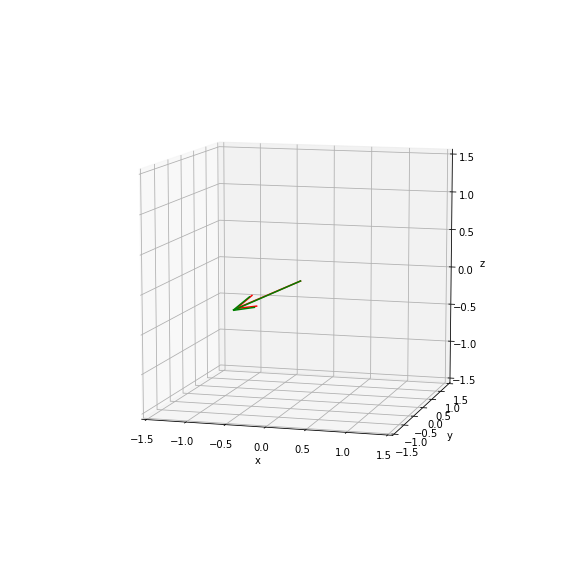

In [2]:
i=100
origin = [0], [0], [0]

X, Y, Z = rat_orientation.X,rat_orientation.Y, rat_orientation.Z

A = np.array([X[i],Y[i],Z[i]])
B = np.array([X[i],0   ,Z[i]])

Am = np.linalg.norm(A)
Bm = np.linalg.norm(A)
B1 = B / Bm

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


plt.quiver(*origin, *A , color=['r'])
plt.quiver(*origin, *B1, color=['g'])

<IPython.core.display.Javascript object>


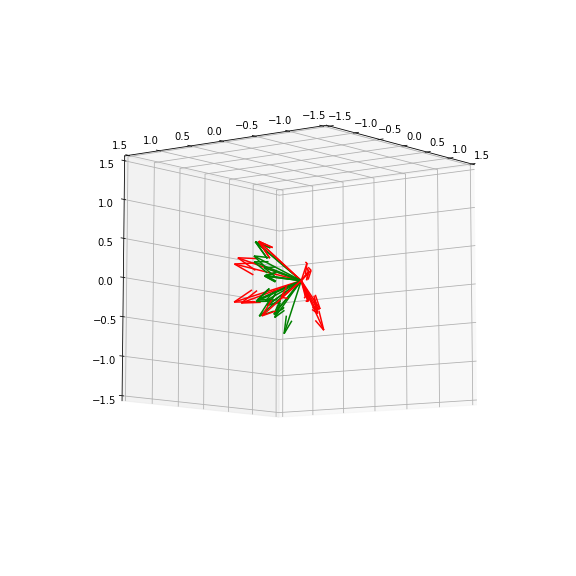

<function __main__.update>

In [3]:
# Visualization of 3D and 2D vector
#i = 100
origin = [0], [0], [0]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])
ax.set_zlim([-1.5, 1.5])

def update(i=0):
    A = np.array([X[i],Y[i],Z[i]])
    B = np.array([X[i],0   ,Z[i]])

    Am = np.linalg.norm(A)
    Bm = np.linalg.norm(A)
    B1 = B / Bm
    QA = ax.quiver(*origin, *A , color=['r'])
    QB = ax.quiver(*origin, *B1, color=['g'])
    
interact(update, i=(0,1000))

In [ ]:
#rotation based on flattened orientation vector

#Rotation of the head for single stimulation event
        
        
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, polar = 'true')
c = ax.scatter(rat_rotation.Time[start_index:stop_index], rat_rotation.Y[start_index:stop_index])
